In [3]:
import nxpd
import jupman
jupman.init('exercises/graphs')


<center>
<span class="jupman-title">Chapter 4: Graphs</span>
</center>
<br/>

# Graphs

<br/>

<div class="alert alert-warning">


**ATTENTION: THIS PAGE IS UNDER CONSTRUCTION, AND CONTAINS MISSING / WRONG INFORMATION. PLEASE IGNORE IT ! **: 
</div>

## 0.1) Graph theory

See Alberto Montresor theory here: http://disi.unitn.it/~montreso/sp/slides/06-grafi.pdf

See [Graphs on the book](https://interactivepython.org/runestone/static/pythonds/Graphs/toctree.html)

In particular, see :
* [Vocabulary and definitions](https://interactivepython.org/runestone/static/pythonds/Graphs/VocabularyandDefinitions.html)

In short short, a graph is a set of vertices linked by edges. 


## 0.2) Directed graphs

In this worksheet we are going to use so called Directed Graphs (`DiGraph` for brevity), that is graphs with _directed_ edges: each edge can be pictured as an arrow linking source node _a_ to target node _b_.  With such an arrow, you can go from _a_ to _b_ but you cannot go from _b_ to _a_ unless there is another edge in the reverse direction. 

* `DiGraph` for us can also have no edges or no verteces at all. 
* Verteces for us can be anything, strings like _'abc'_, numbers like _3_, etc 
* In our model, edges simply link vertices and have no weights
* `DiGraph` is represented as an adjacency list, mapping each vertex to the verteces it is linked to.

<div class="alert alert-info">

**QUESTION**: is `DiGraph` model good for dense or sparse graphs?
</div>

## 0.3) Serious graphs

In this worksheet we follow the Do-It-Yourself methodology and create graph classes from scratch for didactical purposes. Of course, in Python world you have alread nice libraries entirely devoted to graphs like [networkx](https://networkx.github.io/), you can also use them for visualizating graphs. If you have huge graphs to process you might consider big data tools like [Spark GraphX](http://spark.apache.org/graphx) which is programmable in Python.

# 0.4) Code skeleton

First off, download [the exercises zip](_static/graphs-exercises.zip) and look at the files:

* `graph.py`    : the exercise to edit
* `algolab.py`: contains utility functions like `dig` (see later for description) and parent test `DiGraphTest`. Do not modify this file. 
* `graph_test.py`: the tests to run. Do not modify this file.


Before starting to implement methods in `DiGraph` class, read all the following sub sections (starting with '0.x')




## 0.5) Building graphs


<div class="alert alert-info">

**IMPORTANT**: All the functions until <a href="#1.8)-has_edge" >1.8 has_edge() excluded</a> are already
    provided and you don't need to implement them !
</div>


### 0.5.1) Building basics

Let's look at the constructor `__init__` and `add_vertex`. They are already provided and you don't need to implement it:

```python
class DiGraph:
    def __init__(self):
        # The class just holds the dictionary _edges: as keys it has the verteces, and 
        # to each vertex associates a list with the verteces it is linked to.

        self._edges = {}
        
    def add_vertex(self, vertex):
        """ Adds vertex to the DiGraph. A vertex can be any object.
            
            If the vertex already exist, does nothing.
        """
        if vertex not in self._edges:            
            self._edges[vertex] = []            
```           

You will see that inside it just initializes `_edges`. So the only way to create a `DiGraph` is with a call like

In [4]:
g = DiGraph()

`DiGraph` provides an `__str__` method to have a nice printout:

In [5]:
print g


DiGraph()


You can add then vertices to the graph like so:

In [6]:
g.add_vertex('a')
g.add_vertex('b')
g.add_vertex('c')

In [7]:
print g


a: []
b: []
c: []



Adding a vertex twice does nothing:

In [8]:
g.add_vertex('a')
print g


a: []
b: []
c: []



Once you added the verteces, you can start adding directed edges among them with the method `add_edge`:

```python
    def add_edge(self, vertex1, vertex2):
        """ Adds an edge to the graph, from vertex1 to vertex2
        
            If verteces don't exist, raises an Exception.
            If there is already such an edge, exits silently.            
        """
        
        if not vertex1 in self._edges:
            raise Exception("Couldn't find source vertex:" + str(vertex1))

        if not vertex2 in self._edges:
            raise Exception("Couldn't find target vertex:" + str(vertex2))        
            
        if not vertex2 in self._edges[vertex1]:
            self._edges[vertex1].append(vertex2)

```

In [9]:
g.add_edge('a', 'c')
print g


a: ['c']
b: []
c: []



In [10]:
g.add_edge('a', 'b')
print g


a: ['c', 'b']
b: []
c: []



Adding an edge twice makes no difference:

In [11]:
g.add_edge('a', 'b')
print g


a: ['c', 'b']
b: []
c: []



Notice a `DiGraph` can have self-loops too (also called _caps_):

In [12]:
g.add_edge('b', 'b')
print g


a: ['c', 'b']
b: ['b']
c: []



### 0.5.2) dig()

`dig()` is a shortcut to build graphs, it is already provided and you don't need to implement it. **USE IT ONLY WHEN TESTING, *NOT* IN THE `DiGraph` CLASS CODE !!!!  **

With no parameter prints the empty graph:

In [13]:
print dig()


DiGraph()


To build more complex graphs, provide pairs source vertex / target verteces list  like in the following examples:        

In [14]:
print dig('a',['b','c'])


a: ['b', 'c']
b: []
c: []



In [15]:
print dig('a',['b','c'],
          'b', ['b'],
          'c', ['a'])


a: ['b', 'c']
b: ['b']
c: ['a']



### 0.6) Equality

Graphs for us are equal irrespectively of the order in which elements in adjacency lists are specified. So for example 
these two graphs will be considered equal:

In [16]:
dig('a', ['c', 'b']) == dig('a', ['b', 'c'])

True


### 0.7) Basic querying

There are some provided methods to query the `DiGraph`: `adj`, `verteces`, `is_empty`

### 0.7.1) adj

To obtain the edges, you can use the method `adj(self, vertex)`. It is already provided and you don't need to implement it:
```python
    def adj(self, vertex):
        """ Returns the verteces adjacent to vertex. 
            
            NOTE: verteces are returned in a NEW list.
            Modifying the list will have NO effect on the graph!
        """
        if not vertex in self._edges:
            raise Exception("Couldn't find a vertex " + str(vertex))
        
        return self._edges[vertex][:]

```

In [17]:
lst = dig('a', ['b', 'c'],
          'b', ['c']).adj('a')
print lst

['b', 'c']


Let's check we actually get back a new list (so modifying the old one won't change the graph):

In [18]:
lst.append('d')
print lst

['b', 'c', 'd']


In [19]:
print g.adj('a')

['c', 'b']


**NOTE**: This technique of giving back copies is also called _defensive copying_: it prevents users from modifying the 
internal data structures of a class instance in an uncontrolled manner. For example, if we allowed them direct access to the internal verteces list, they could add duplicate edges, which we don't allow in our model.
If instead we only allow users to add edges by calling `add_edge`, we are sure the constraints for our model will always remain satisfied.

### 0.7.2) is_empty()

We can check if a `DiGraph` is empty. It is already provided and you don't need to implement it:

```python
    def is_empty(self):
        """  A DiGraph for us is empty if it has no verteces and no edges """
        
        return len(self._edges) == 0
```

In [20]:
print dig().is_empty()

True


In [21]:
print dig('a',[]).is_empty()

False


## 0.7.3) verteces()

To obtain the verteces, you can use the function `verteces`. (NOTE for Italians: method is called vert**e**c**e**s, with two **e**s !!!). It is already provided and you don't need to implement it:

```python
    def verteces(self):
        """ Returns a set of the graph verteces. Verteces can be any object. """
        
        # Note dict keys() return a list, not a set. Bleah.  
        # See http://stackoverflow.com/questions/13886129/why-does-pythons-dict-keys-return-a-list-and-not-a-set
        return set(self._edges.keys()) 
```

In [22]:
g = dig('a', ['c', 'b'],
          'b', ['c'])
print g.verteces()

set(['a', 'c', 'b'])


Notice it returns a _set_, as verteces are stored as keys in a dictionary, so they are not supposed to be in any particular order. When you print the whole graph you see them vertically ordered though, for clarity purposes:

In [23]:
print g


a: ['c', 'b']
b: ['c']
c: []



Verteces in the edges list are instead stored and displayed in the order in which they were inserted.


## 1) Implement building methods

### 1.1) has_edge

Enough for talking! Implement this method in `DiGraph`: 

```python
    def has_edge(self, source, target):
        """  Returns True if there is an edge between source vertex and target vertex. 
             Otherwise returns False.

            If either source, target or both verteces don't exist raises an Exception.
        """
        
        raise Exception("TODO IMPLEMENT ME!")                             
```

### 1.2) full_graph

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !

```python
def full_graph(verteces):
    """ Returns a DiGraph which is a full graph with provided verteces list.
    
        In a full graph all verteces link to all other verteces (including themselves!).
    """
    
    raise Exception("TODO IMPLEMENT ME!")
```    

### 1.3) dag

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !

```python
def dag(verteces):
    """ Returns a DiGraph which is DAG (Directed Acyclic Graph) made out of provided verteces list
    
        Provided list is intended to be in topological order.
        NOTE: a DAG is ACYCLIC, so caps (self-loops) are not allowed !!
    """

    raise Exception("TODO IMPLEMENT ME!")
```

## 1.11) list_graph

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !


```python
def list_graph(n):
    """ Return a graph of n verteces displaced like a 
        monodirectional list:  1 -> 2 -> 3 -> ... -> n 
        
        Each vertex is a number i, 1 <= i <= n  and has only one edge connecting it
        to the following one in the sequence        
        If n = 0, return the empty graph.
        if n < 0, raises an Exception.
    """    
        
    raise Exception("TODO IMPLEMENT ME!")
```

## 1.12) star_graph

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !


```python
def star_graph(n):
    """ Returns graph which is a star with n nodes 

        First node is the center of the star and it is labeled with 1. This node is linked 
        to all the others. For example, for n=4 you would have a graph like this:
        
                3
                ^
                |    
           2 <- 1 -> 4           
           
        If n = 0, the empty graph is returned
        If n < 0, raises an Exception           
    """    
    
    raise Exception("TODO IMPLEMENT ME!")    
```



# 2) Manipulate graphs

You will now implement some methods to manipulate graphs.

## 2.1) remove_vertex

```python
    def remove_vertex(self, vertex):
        """ Removes the provided vertex  and returns it
            
            If the vertex is not found, raises an Exception.
        """
                
        raise Exception("TODO IMPLEMENT ME!")
```
    
## 2.2) reverse


```python    
    def reverse(self):
        """ Reverses the direction of all the edges """
           
        raise Exception("TODO IMPLEMENT ME!")
```

## 2.3) has_self_loops    

```python    

    def has_self_loops(self):
        """ Returns True if the graph has any self loop (a.k.a. cap), False otherwise """
        
        raise Exception("TODO IMPLEMENT ME !")
```

## 2.4) remove_self_loops    

```python    

    def remove_self_loops(self):
        """ Removes all of the self-loops edges (a.k.a. caps) 
            
            NOTE: Removes just the edges, not the verteces!
        """


        raise Exception("TODO IMPLEMENT ME!")
```




# 3) Query graphs 

You can query graphs the "Do it yourself" way with Depth First Search (DFS) or Breadth First Search (BFS). 

## 3.1) Visit and VertexLog

If you noticed, in the skeleton there are two extra classes `Visit` and `VertexLog`. Also, in `DiGraph` the functions `dfs` and `bfs` are already provided. The idea here is that both `dfs` and `bfs` will traverse the graph and report the intermediate results of the visit inside instances of `Visit` and `VertexLog`. At the end of the traversal, they will give back one instance of `Visit`. Maybe when you do exercises on paper it is convenient to write for example the discovery times inside the nodes of your graphs, but when programming writing intermediate results directly in the verteces of the input graph may cause troubles to the users of your methods. So it is better to store such visit logs in separate data structures: basically, `Visit` contains a a map that associates to each vertex its `VertexLog`:

```python
class Visit:
    """ The visit of a DiGraph visit sequence. 
    
    """

    def __init__(self):
        """ Creates a Visit """
            
        self._logs = {}

```

In `VertexLog` you can put the intermediate info like i.e. discovery_time, or parents of the node if you are interested in building a tree.

```python

class VertexLog:
    """ Represents the visit log a single DiGraph vertex
    
        This class is very simple and doesn't even have getters methods. 

        You can just access fields by using the dot:

            print vertex_log.discovery_time

        and set them directly:

            vertex_log.finish_time = 5
        
        If you want, an instances you can set your own fields:
        
            vertex_log.my_own_field = "whatever"
    """
    
    def __init__(self, vertex):
        self.vertex = vertex
        self.discovery_time = -1
        self.finish_time = -1
        self.parent = None  
```

Let's make a simple example: 

In [24]:
g = dig('a', ['a','b', 'c'],
        'b', ['c'],
        'd', ['e'])
print g.dfs('a')

Visit:
[   {   'discovery_time': 1, 'finish_time': 6, 'parent': None, 'vertex': 'a'},
    {   'discovery_time': 2, 'finish_time': 5, 'parent': 'a', 'vertex': 'b'},
    {   'discovery_time': 3, 'finish_time': 4, 'parent': 'b', 'vertex': 'c'}]


Notice we started from 'a', so by default unreachable nodes like `d` and `e` were not displayed. Let's try a `bfs`:

In [25]:
print g.bfs('a')

Visit:
[   {   'discovery_time': 1, 'finish_time': -1, 'parent': None, 'vertex': 'a'},
    {   'discovery_time': 2, 'finish_time': -1, 'parent': 'a', 'vertex': 'b'},
    {   'discovery_time': 3, 'finish_time': -1, 'parent': 'a', 'vertex': 'c'}]


Predictably, results are different, you can see it by the `parent` fields. Note how the `finish_time ` here is always _-1_ because it is less meaningful to calculate it for a 'bfs'. 

You can extract the logs from the `Visit` object by calling `logs()`:

In [26]:
pp(g.dfs('a').logs())

[   {   'discovery_time': 1, 'finish_time': 6, 'parent': None, 'vertex': 'a'},
    {   'discovery_time': 2, 'finish_time': 5, 'parent': 'a', 'vertex': 'b'},
    {   'discovery_time': 3, 'finish_time': 4, 'parent': 'b', 'vertex': 'c'}]


By default, they are sorted ascending by discovery time. To see them in descending order, use `descendant=False`:

In [27]:
pp(g.dfs('a').logs(descendant=True))  

[   {   'discovery_time': 3, 'finish_time': 4, 'parent': 'b', 'vertex': 'c'},
    {   'discovery_time': 2, 'finish_time': 5, 'parent': 'a', 'vertex': 'b'},
    {   'discovery_time': 1, 'finish_time': 6, 'parent': None, 'vertex': 'a'}]


To see the last timestamp, use `last_time`: 

In [28]:
print g.dfs('a').last_time()

6



## 3.2) distances()

Try to implement this method of `DiGraph`:

```python 
    def distances(self, source):
        """ 
        Returns a dictionary where the keys are verteces, and each vertex v is associated
        to the *minimal* distance in number of edges required to go from the source 
        vertex to vertex v. If node is unreachable, the distance will be -1
        
        Source has distance zero from itself
        Verteces immediately connected to source have distance one.

        if source is not a vertex, raises an Exception
        
        HINT: to implement this, copy and edit either dfs or bfs. Question: which one ?
        """        
```

If you look at the following graph, you can see an example of the distances to associate to each vertex, supposing that the `source` is `a`. Note that `a` iself is at distance zero from itself and also that unreachable nodes like `f` and `g` will be at distance _-1_ :
    

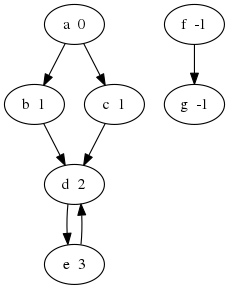

In [12]:
nxpd.draw(jupman.show_distances(), show='ipynb')

`distances('a')` called on this graph would return a map like this: 
```python
{
  'a':0,
  'b':1,
  'c':1,
  'd':2,
  'e':3,
  'f':-1,
  'g':-1,
  
}
```

## 3.2) Play with dfs and bfs

Create small graphs (like linked lists a->b->c, triangles, mini-full graphs, trees - you can also use the functions you defined to create graphs like `full_graph`, `dag`, `list_graph`, `star_graph`) and try to predict 
the visit sequence (verteces order, with discovery and finish times) you would have running a dfs or bfs. 
Then write tests that assert you actually get those sequences when running provided dfs and bfs

## 3.3) Blow up you computer

Try to call the already implemented function `gen_graphs` with small numbers for `n`, like _1_, _2_ , _3_ , _4_ .... Just with _2_ we get back a lot of graphs:

```python

def gen_graphs(n):    
    """ Returns a list with all the possible 2^(n^2) graphs of size n 
    
        Verteces will be identified with numbers from 1 to n 
    """    

```



In [30]:
print gen_graphs(2)

[
1: []
2: []
, 
1: []
2: [2]
, 
1: []
2: [1]
, 
1: []
2: [1, 2]
, 
1: [2]
2: []
, 
1: [2]
2: [2]
, 
1: [2]
2: [1]
, 
1: [2]
2: [1, 2]
, 
1: [1]
2: []
, 
1: [1]
2: [2]
, 
1: [1]
2: [1]
, 
1: [1]
2: [1, 2]
, 
1: [1, 2]
2: []
, 
1: [1, 2]
2: [2]
, 
1: [1, 2]
2: [1]
, 
1: [1, 2]
2: [1, 2]
]


In [31]:
 

<div class="jupman-question"> 
QUESTION: What happens if you call `gen_graphs(10)` ? How many graphs do you get back ?
</div>

# 4) Do cool stuff with theory 

- find connected components
- determine if a graph is acyclic
- find node distances

In [4]:
from graphs_solution import *
jupman.run(VisitTest)


...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


In [33]:
jupman.run(DiGraphTest)

.....................................
----------------------------------------------------------------------
Ran 37 tests in 0.099s

OK


# Solution

 Solutions are in a [separate file](graphs_solution.py).